In [7]:
import numpy as np
import math
from deap import base, creator, tools
import random
import matplotlib.pyplot as plt
import time
from scipy.optimize import minimize
import json
import pandas as pd
from src.models.AlgEvolution import AlgoritimoEvolutivoRCE
from src.models.Setup import Setup
from src.models.DataExploration import DataExploration

from IPython.display import display
import math




-----------------------
def  Critério_1
Aptidão do indivíduo é menor ou igual que (1 + parametro_perc) * aptidão do melhor indivíduo

Para todos os indivíduos da pop atual
Se individuo atende ao critério 1
     inserir HOF
Se lista vazia
          inserir individuo
     Senão
          Se individuo é diferente de todos da lista
                inserir individuo
-----------------------
def compararIndividuosSelecionados():
Para todos indivíduos da lista
       def Calcular Diff - diferença entre as variáveis de indivíduo e individuo lista
       Se Diff não é maior que parâmetro_diff em mais de parâmetro_var -> numero de variaveis diferentes (min 2) 
             Retorna falso
Fim Para
Retorna verdadeiro



[ x ] Corrigir conjunto elite - Set()

[] Dados entrada do Framework com GUI

[ ] Criterio 2 alternative

[ ] Implementação do programa e simulações do Alg Evolutivo

[ ] Coleta e analise de dados

- Tipo, qtde e limite de variáveis de decisão são dados de entrada e impactam em ajuste da função individual do DEAP (isso será visto depois).
- Verificar se a explicação do resultado e os gráficos estão corretos.

## Codigo usuario

In [8]:
def fitness_function_sistema_controle(individual, decision_variables):
    C = individual
    L = 0.1  # Indutância fixa
    R = 5  # Resistência fixa
    T = 1 / (2 * math.pi * math.sqrt(L * C))
    return T


# Gerar array de valores para C
C_values = np.linspace(0.1, 10, 20)  # Valores de C variando de 0.1 a 10


#! Definir a função de aptidão (fitness function) para a Turbina
def fitness_function_turbina(individual, decision_variables):
    X, y = decision_variables
    # Calcular a diferença absoluta entre a potência ativa medida e a potência teórica esperada
    diff = abs(y - individual * X)
    # Calcular a aptidão como a negação da diferença, para maximizar a semelhança
    return np.mean(diff)


def rastrigin_decisionVariables(individual, decision_variables):
    rastrigin = 10 * len(decision_variables)
    for i in range(len(decision_variables)):
        rastrigin += individual[i] * individual[i] - 10 * (
            math.cos(2 * np.pi * individual[i])
        )
    return rastrigin


def rosenbrock_decisionVariables(individual, decision_variables):
    result = 0
    for i in range(len(decision_variables) - 1):
        result += (
            100 * (individual[i + 1] - individual[i] ** 2) ** 2
            + (1 - individual[i]) ** 2
        )
    return result

## Dados entrada

In [9]:
def load_params(file_path):
    with open(file_path, "r") as file:
        params = json.load(file)
    return params


#! Carregar os dados
turbina = pd.read_csv(
    "/home/pedrov/Documentos/GitHub/Engenharia-Eletrica-UFF/Iniciação Cientifica - Eng Eletrica UFF/evolution_rce_master/src/assets/datasets/T1.csv"
)
turbina.columns = [
    "Data/hora",
    "ActivePower(kW)",
    "WindSpeed(m/s)",
    "Curva_Teórica(KWh)",
    "Direção do Vento",
]
display(turbina.head())

X = turbina[["WindSpeed(m/s)"]].values
y = turbina[["ActivePower(kW)"]].values
data_hora = turbina[["Data/hora"]].values
curva = turbina[["Curva_Teórica(KWh)"]].values
vento = turbina[["Direção do Vento"]].values

print(X.shape, y.shape)

,Data/hora,ActivePower(kW),WindSpeed(m/s),Curva_Teórica(KWh),Direção do Vento
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


(50530, 1) (50530, 1)


## Main

In [10]:
TIPO = [float, int, str]
QUANTIDADE = len(TIPO)
LIMITE_VAR = [(0.0, 1.0), (1, 10), ["A", "B", "C"]]

dadosEntrada = [TIPO, QUANTIDADE, LIMITE_VAR]

# Definição das variáveis para o Problema da Mochila (Knapsack Problem)
TIPO_KNAPSACK = int
QUANTIDADE_KNAPSACK = 15  # Por exemplo, considerando 15 itens disponíveis
LIMITE_VAR_KNAPSACK = (
    0,
    1,
)  # Valores binários {0, 1} indicando se o item está na mochila ou não

dadosEntradaMochila = [TIPO_KNAPSACK, QUANTIDADE_KNAPSACK, LIMITE_VAR_KNAPSACK]

Método escolhido: Minimizar


/home/pedrov/.local/lib/python3.11/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Fitness' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/pedrov/.local/lib/python3.11/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/pedrov/.local/lib/python3.11/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "




	 RCE being applied! - Generation = 20 

Elitismo HOF Index[0] [-1.1038175522574925, -1.0299668709224266, -0.08848568355160946, 1.073033517516173, -0.9398381958485764, 0.9993810260680096, -0.8416858693084883, 0.034626866404747325, -0.8748720087315682, 0.11534319272746174] 
 Fitness = (22.5215750831387,) | Diversidade = -2.65628157790377

	 CRITÉRIO 2 RCE 

Fitness calculado com 0.4 = 32

 Soma Diff =  0.11856521713064971
array ind selecionados:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.11856521713064971, 0.0, 0.0]
debug 0.0 3
contador =  0
Não é diferente 

 Soma Diff =  0.11856521713064971
array ind selecionados:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.11856521713064971, 0.0, 0.0]
debug 0.0 3
contador =  0
debug 0.0 3
contador =  0
Não é diferente 

 Soma Diff =  0.11856521713064971
array ind selecionados:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.11856521713064971, 0.0, 0.0]
debug 0.0 3
contador =  0
debug 0.0 3
contador =  0
Não é diferente 

 Soma Diff =  0.11856521713064971
array ind s

,Generations,index,Variaveis de Decisão,Fitness,RCE,Diversidade,CLONE
0,20,0,"[-1.1038175522574925, -1.0299668709224266, -0....",22.521575,HOF,-2.656282,NAO
1,20,1,"[-1.1038175522574925, -1.0299668709224266, -0....",23.650492,SIM,-2.774847,NAO
2,20,2,"[-1.1038175522574925, -0.028706840115080512, -...",22.575974,SIM,-1.773587,NAO
3,20,3,"[-1.1038175522574925, -1.0299668709224266, -0....",26.856309,SIM,-3.069449,NAO
4,20,4,"[-1.1038175522574925, -1.0299668709224266, -0....",29.146595,SIM,-4.843833,NAO
5,20,5,"[-1.1038175522574925, -0.986406044330872, -0.0...",23.422375,SIM,-2.731286,NAO
6,20,6,"[-1.1038175522574925, -1.0299668709224266, -0....",25.461994,SIM,-2.952957,NAO
7,20,7,"[-1.1038175522574925, -1.0299668709224266, -0....",24.891299,SIM,-3.665910,NAO
8,20,8,"[0.17593782476938902, 1.3108192283643145, 1.77...",129.295291,,9.011090,NAO
9,20,9,"[0.5367312507493125, -4.795377720647298, 3.977...",155.265845,,3.938349,NAO


CLONE
NAO    8
Name: count, dtype: int64


População gerada pelo RCE
 [[-1.1038175522574925, -1.0299668709224266, -0.08848568355160946, 1.073033517516173, -0.9398381958485764, 0.9993810260680096, -0.8416858693084883, 0.034626866404747325, -0.8748720087315682, 0.11534319272746174], [-1.1038175522574925, -1.0299668709224266, -0.08848568355160946, 1.073033517516173, -0.9398381958485764, 0.9993810260680096, -0.8416858693084883, 0.034626866404747325, -0.8748720087315682, 0.11534319272746174], [-1.1038175522574925, -2.2037994313908964, -0.08848568355160946, 1.073033517516173, -0.9398381958485764, 0.9993810260680096, -0.8416858693084883, -0.21456773218273378, -0.8748720087315682, 0.11534319272746174], [-1.1038175522574925, -1.0299668709224266, -0.08848568355160946, 1.073033517516173, -0.9398381958485764, 0.9993810260680096, -0.8416858693084883, -0.08393835072590239, -0.8748720087315682, 0.11534319272746174], [-1.1038175522574925, -1.0299668709224266, -0.08848568355160946, 1.073033517516173, -0.9398381958485764, 0.9993810260680096, -0

,Generations,index,Variaveis de Decisão,Fitness,RCE,Diversidade,CLONE
0,40,0,"[-1.1038175522574925, -0.028706840115080512, -...",10.437049,HOF,0.985668,NAO
1,40,1,"[3.1331696822578836, 3.319306515892724, -2.353...",227.693358,,-16.523346,NAO
2,40,2,"[2.092281672636931, -1.7417300242437683, 5.073...",172.423299,,1.032512,NAO
3,40,3,"[4.284052835018755, 2.6944085526110637, 3.6308...",224.350902,,21.847384,NAO
4,40,4,"[0.40370792731094607, -0.9636716082914738, 2.3...",190.501241,,4.847873,NAO
5,40,5,"[-0.7734825446061855, 3.93943900120781, -0.117...",174.936118,,-7.858100,NAO
6,40,6,"[-1.2992313804713298, -3.078336971161448, 0.01...",158.745971,,-10.926587,NAO
7,40,7,"[-4.956922491392093, 2.2980801272228986, 2.232...",162.355159,,-3.846346,NAO
8,40,8,"[1.5369877709475794, 1.8682514765342502, 3.234...",158.546225,,13.822481,NAO
9,40,9,"[1.79193695043935, 3.3692299828041774, -1.1835...",191.046280,,8.927418,NAO


CLONE
NAO    1
Name: count, dtype: int64


População gerada pelo RCE
 [[-1.1038175522574925, -0.028706840115080512, -0.08848568355160946, 1.073033517516173, 0.012309800330640663, 0.9993810260680096, 0.057060051441174764, 0.034626866404747325, -0.042702161508063274, 0.0729692802786932], [-1.1038175522574925, -0.028706840115080512, -0.08848568355160946, 1.073033517516173, 0.012309800330640663, 0.9993810260680096, 0.057060051441174764, 0.034626866404747325, -0.042702161508063274, 0.0729692802786932], [-1.1038175522574925, -0.028706840115080512, -0.08848568355160946, 1.073033517516173, 0.012309800330640663, 0.9993810260680096, 0.057060051441174764, 0.034626866404747325, -0.042702161508063274, 0.0729692802786932], [-1.1038175522574925, -0.028706840115080512, -0.08848568355160946, 1.073033517516173, 0.012309800330640663, 0.9993810260680096, 0.057060051441174764, 0.034626866404747325, -0.042702161508063274, 0.0729692802786932], [-1.1038175522574925, -0.028706840115080512, -0.08848568355160946, 1.073033517516173, 0.012309800330640663,

,Generations,index,Variaveis de Decisão,Fitness,RCE,Diversidade,CLONE
0,60,0,"[-1.1038175522574925, -0.028706840115080512, 0...",7.887062,HOF,-1.137152,NAO
1,60,1,"[-1.1038175522574925, -0.028706840115080512, 0...",7.897630,SIM,-0.056417,NAO
2,60,2,"[-0.9100737237365424, -3.2596141898849247, 1.3...",182.887719,,-1.517567,NAO
3,60,3,"[2.86880298341881, 2.365043989376833, 4.910178...",173.034674,,18.590271,NAO
4,60,4,"[4.4422544329234155, -0.10650249034954751, -2....",218.652696,,-8.295111,NAO
5,60,5,"[-3.3964616716802336, 2.221046615204841, -3.32...",175.537494,,-11.567354,NAO
6,60,6,"[-3.739751590043518, 2.4288771301668417, -2.02...",211.368538,,-3.174435,NAO
7,60,7,"[0.7022829489510434, 2.4741708837575844, -0.83...",229.436217,,-13.754294,NAO
8,60,8,"[3.5678255619935166, -4.974513259317361, -2.82...",222.433822,,-4.758689,NAO
9,60,9,"[1.938231001779931, 1.2085235465744972, 0.5942...",117.527600,,1.622235,NAO


CLONE
NAO    2
Name: count, dtype: int64


População gerada pelo RCE
 [[-1.1038175522574925, -0.028706840115080512, 0.01758752352858295, -0.07512513154385925, 0.012309800330640663, 0.9993810260680096, 0.057060051441174764, 0.034626866404747325, -0.042702161508063274, -1.0077652577095957], [-1.1038175522574925, -0.028706840115080512, 0.01758752352858295, -0.07512513154385925, 0.012309800330640663, 0.9993810260680096, 0.057060051441174764, 0.034626866404747325, -0.042702161508063274, 0.0729692802786932], [-1.1038175522574925, -0.028706840115080512, 0.01758752352858295, -0.07512513154385925, 0.012309800330640663, 0.9993810260680096, 0.057060051441174764, 0.034626866404747325, -0.042702161508063274, -1.0077652577095957], [-1.1038175522574925, -0.028706840115080512, 0.01758752352858295, -0.07512513154385925, 0.012309800330640663, 0.9993810260680096, 0.057060051441174764, 0.034626866404747325, -0.042702161508063274, 0.0729692802786932], [-1.1038175522574925, -0.028706840115080512, 0.01758752352858295, -0.07512513154385925, 0.0123098

,Generations,index,Variaveis de Decisão,Fitness,RCE,Diversidade,CLONE
0,80,0,"[-1.1038175522574925, -0.028706840115080512, 0...",7.887062,HOF,-1.137152,NAO
1,80,1,"[-0.4312434183018823, -0.15310590367643595, -4...",173.618164,,0.010364,NAO
2,80,2,"[1.1132261364622513, -1.3702400190955122, 4.26...",153.019078,,-16.819669,NAO
3,80,3,"[-2.0024260416776474, -1.8090130212629298, -2....",135.581025,,-4.880911,NAO
4,80,4,"[-4.38927779494347, 2.694481486939825, -1.6461...",212.001060,,-4.021399,NAO
5,80,5,"[-1.091102391719713, -1.0512828023570675, -0.7...",82.684823,,-11.384129,NAO
6,80,6,"[3.863435037788242, -1.0141999261232888, 0.621...",159.448185,,3.165063,NAO
7,80,7,"[0.6599712169350163, 0.0305033273622497, -0.06...",138.938812,,-8.841378,NAO
8,80,8,"[3.0331106144276037, -1.4596628740288473, 4.44...",214.910372,,-5.150329,NAO
9,80,9,"[-2.3231151547361595, 2.119124362117378, 4.283...",155.451461,,7.227572,NAO


CLONE
NAO    1
Name: count, dtype: int64


População gerada pelo RCE
 [[-1.1038175522574925, -0.028706840115080512, 0.01758752352858295, -0.07512513154385925, 0.012309800330640663, 0.9993810260680096, 0.057060051441174764, 0.034626866404747325, -0.042702161508063274, -1.0077652577095957], [-1.1038175522574925, -0.028706840115080512, 0.01758752352858295, -0.07512513154385925, 0.012309800330640663, 0.9993810260680096, 0.057060051441174764, 0.034626866404747325, -0.042702161508063274, -1.0077652577095957], [-1.1038175522574925, -0.028706840115080512, 0.01758752352858295, -0.07512513154385925, 0.012309800330640663, 0.9993810260680096, 0.057060051441174764, 0.034626866404747325, -0.042702161508063274, -1.0077652577095957], [-1.1038175522574925, -0.028706840115080512, 0.01758752352858295, -0.07512513154385925, 0.012309800330640663, 0.9993810260680096, 0.057060051441174764, 0.034626866404747325, -0.042702161508063274, -1.0077652577095957], [-1.1038175522574925, -0.028706840115080512, 0.01758752352858295, -0.07512513154385925, 0.01230

,Generations,index,Variaveis de Decisão,Fitness,RCE,Diversidade,CLONE
0,100,0,"[-1.1038175522574925, -0.028706840115080512, 0...",6.050827,HOF,-0.000980,NAO
1,100,1,"[-1.1038175522574925, -0.028706840115080512, 0...",6.953064,SIM,-0.107661,NAO
2,100,2,"[-1.1038175522574925, -0.028706840115080512, 0...",6.562890,SIM,0.035450,NAO
3,100,3,"[-1.1038175522574925, -0.028706840115080512, 0...",8.133858,SIM,-1.108650,NAO
4,100,4,"[-3.184333001520968, -3.228129364761852, -3.03...",175.752007,,1.354824,NAO
5,100,5,"[4.449631473043184, -1.24167582700915, -2.9246...",170.742967,,-6.757872,NAO
6,100,6,"[3.0775237447676167, 4.366607585473351, 4.5142...",225.820628,,2.374462,NAO
7,100,7,"[-3.1203170024643976, 1.3870212986535604, 2.46...",201.740368,,9.588225,NAO
8,100,8,"[2.0405292911632467, 3.617664482629478, 0.4076...",206.530059,,24.908108,NAO
9,100,9,"[1.084639893416817, -3.72104971518939, -4.9446...",180.635114,,5.661081,NAO


CLONE
NAO    4
Name: count, dtype: int64


População gerada pelo RCE
 [[-1.1038175522574925, -0.028706840115080512, 0.01758752352858295, 0.031556105669845264, 0.012309800330640663, 0.9993810260680096, 0.057060051441174764, 0.034626866404747325, -0.042702161508063274, 0.02172523156434414], [-1.1038175522574925, -0.028706840115080512, 0.01758752352858295, 0.031556105669845264, 0.012309800330640663, 0.9993810260680096, 0.057060051441174764, 0.034626866404747325, -0.042702161508063274, 0.02172523156434414], [-1.1038175522574925, -0.028706840115080512, 0.01758752352858295, 0.031556105669845264, 0.012309800330640663, 0.9993810260680096, 0.057060051441174764, 0.034626866404747325, -0.042702161508063274, 0.02172523156434414], [-1.1038175522574925, -0.028706840115080512, 0.01758752352858295, 0.031556105669845264, 0.012309800330640663, 0.9993810260680096, 0.057060051441174764, 0.034626866404747325, -0.042702161508063274, 0.02172523156434414], [-1.1038175522574925, -0.028706840115080512, 0.01758752352858295, 0.031556105669845264, 0.01230

,Generations,index,Variaveis de Decisão,Fitness,Media,Desvio Padrao,RCE
0,1,0,"[-3.0017479956539592, -1.0299668709224266, 2.9...","(108.50513582663764,)",160.961758,0.0,-
1,1,1,"[-4.179868682805383, 0.534012163175607, -2.615...","(210.41290514734095,)",160.961758,0.0,-
2,1,2,"[2.824351035468508, 1.586484882828735, 2.60137...","(167.00807684540843,)",160.961758,0.0,-
3,1,3,"[-4.812754570524271, 3.3468394268111306, -2.07...","(210.97757708251845,)",160.961758,0.0,-
4,1,4,"[3.7337306296233015, 0.31171544850206967, 2.70...","(264.636507656897,)",160.961758,0.0,-
...,...,...,...,...,...,...,...
9995,100,95,"[-1.705604907144267, -3.415884175892156, -1.76...","(147.38411082312805,)",181.807434,0.0,-
9996,100,96,"[-2.879378075269307, 1.9241676233683203, 1.535...","(177.51683367212027,)",181.807434,0.0,-
9997,100,97,"[-5.104867350340984, 1.4103625094080279, 2.947...","(170.63671263995911,)",181.807434,0.0,-
9998,100,98,"[2.3819655504107518, -3.5305939864946927, 1.25...","(239.19834423240027,)",181.807434,0.0,-



	 VISUALIZANDO OS RESULTADOS



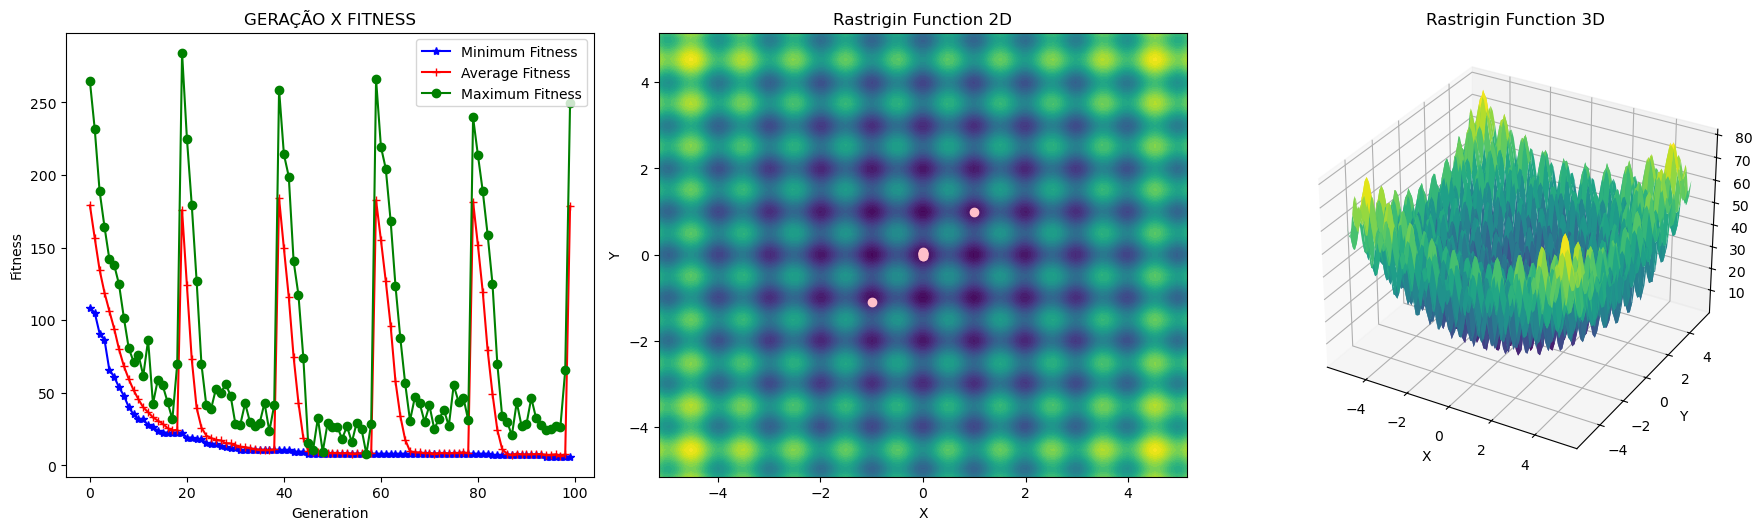

Soluções do problema

Best solution index =  94

Best solution variables =
 [-5.0749216349667154, 1.5865540432391354, 3.367107828621907, -3.7870047572066428, 0.7623891680764867, 4.897160899359506, 3.4172592109008706, 3.1346937646040667, -4.956566891662324, -4.347241128014592]

Best solution fitness =  6.050826818414018

Ótimo global da função Rastrigin =  138.2982503607902

Solução ótima global =  [-4.97469114  1.98991252  2.98485546 -3.97978369  0.994959    4.9746912
  2.98485611  2.98485552 -4.97469159 -3.97978401]

Porcentagem de proximidade da solução em relação ao ótimo global =  95.62479872114889 %

Distância da solução em relação ao ótimo global = <built-in function abs>


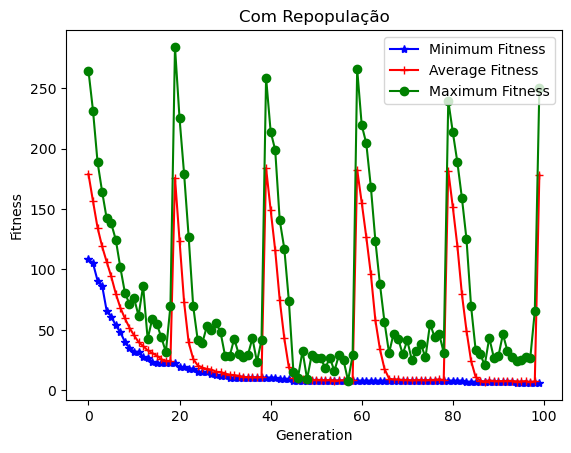

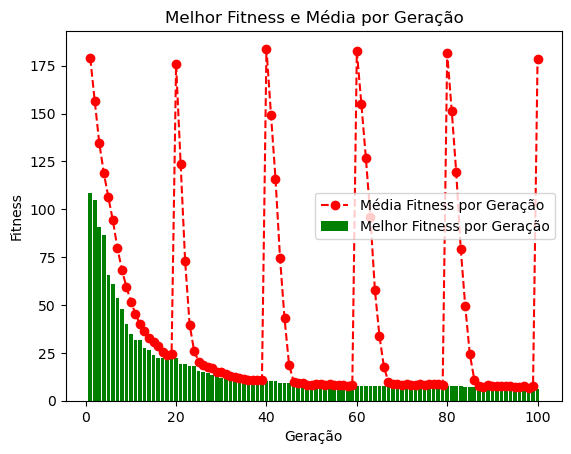

,Generation,Min Fitness,Average Fitness,Max Fitness,Std Fitness
0,0,108.505136,179.029617,264.636508,28.657683
1,1,105.063263,156.453327,231.481658,28.245900
2,2,90.788979,134.594626,188.826871,19.590759
3,3,86.632534,119.051094,164.451904,15.428989
4,4,65.808137,106.372203,142.296012,14.938869
...,...,...,...,...,...
95,95,6.050827,7.249662,25.257325,2.279270
96,96,6.050827,7.572475,27.356610,3.790276
97,97,6.050827,6.677469,26.497989,2.062823
98,98,6.050827,7.476150,65.425986,7.326641


Total execution time: 4.67 seconds


In [11]:
if __name__ == "__main__":

    tempo1 = time.time()

    # Setup
    params = load_params(
        "/home/pedrov/Documentos/GitHub/Engenharia-Eletrica-UFF/Iniciação Cientifica - Eng Eletrica UFF/evolution_rce_master/src/db/parameters.json"
    )
    setup = Setup(params)
    alg = AlgoritimoEvolutivoRCE(setup)
    data_visual = DataExploration()

    pop_with_repopulation, logbook_with_repopulation, best_variables = alg.run(
        RCE=True,
        #fitness_function=rastrigin_decisionVariables,
        #decision_variables=(X, y, data_hora, curva, vento),
    )

    print("\n\nEvolução concluída  - 100%")

    # Salvar resultados
    alg.cout("---> RESULTADOS OBTIDOS")
    data_visual.displayDataFrameInfo(
        alg.allIndividualValuesArray, "Todos Individuos Gerados"
    )
    # data_visual.show_conjuntoElite(alg.pop_RCE)

    # Visualização dos resultados
    alg.cout("VISUALIZANDO OS RESULTADOS")
    data_visual.show_rastrigin_benchmark(logbook_with_repopulation, best_variables)
    data_visual.visualize(
        logbook_with_repopulation, pop_with_repopulation, repopulation=True
    )
    data_visual.statistics_per_generation_df(logbook_with_repopulation)

    tempo2 = time.time()
    print(f"Total execution time: {round(tempo2-tempo1,2)} seconds")

In [12]:
def linear_search(populacao, criterio, *args):
    individuos_selecionados = []

    for individuo in populacao:
        if criterio(individuo, *args):
            if individuo not in individuos_selecionados:
                if all(elemento in individuos_selecionados for elemento in individuo):
                    individuos_selecionados.append(individuo)

    return individuos_selecionados


# criterio 2 - verificar se todos os elementos estão
print("\n\nComparando variáveis de decisao")
lista = []
conjunto = set()
for i in range(len(alg.POP_OPTIMIZATION)):

    diff = np.array(alg.POP_OPTIMIZATION[i]) - np.array(alg.POP_OPTIMIZATION[i+3])

    if sum(diff) > 10:
        if (alg.POP_OPTIMIZATION[i] not in lista) and (
            alg.POP_OPTIMIZATION[i] not in alg.POP_OPTIMIZATION[1 + 1]
        ):
            print("\nIndividuo adicionado", alg.POP_OPTIMIZATION[i])
            lista.append(alg.POP_OPTIMIZATION[i])
            conjunto.add(tuple(alg.POP_OPTIMIZATION[i]))
            #print("Delta= ", sum(diff))

print(len(lista))
print(len(conjunto))


#alg.POP_OPTIMIZATION[0]



Comparando variáveis de decisao


AttributeError: 'AlgoritimoEvolutivoRCE' object has no attribute 'POP_OPTIMIZATION'